## Loading dataframes

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


os.chdir("/home/g.esposito/AlternativeModels-SC2")
path = os.getcwd()

log_folders = [file_path for file_path in os.listdir("/home/g.esposito/AlternativeModels-SC2") if file_path.startswith("FSIM_W_local_img_classification_ranger_")]
# print(log_folders)

ranger_general_report = pd.DataFrame([])
ranger_new_report = pd.DataFrame([])
for layer_conf in log_folders:
    if layer_conf != ".DS_Store":
        folder_path = os.path.join(path,  layer_conf)
        for cnf in [files for files in os.listdir(folder_path) if files != ".DS_Store" and not files.endswith('.log')]:

            file_path = os.path.join(folder_path, cnf)

            report_path = os.path.join(file_path, "fsim_full_report.csv")
            report = pd.read_csv(report_path)
            report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"

            report.drop(columns=['Unnamed: 0'], inplace=True)
            report['bit_faulty_pos']=np.log2(report['bitmask']).astype(int)
            
            report['MRAD']=abs(100*(report['fault_ACC@1']-report['gold_ACC@1'])/report['gold_ACC@1'])
            report['MRADk']=abs(100*(report['fault_ACC@k']-report['gold_ACC@k'])/report['gold_ACC@k'])
            report['AbsAD']=abs((report['fault_ACC@1']-report['gold_ACC@1']))
            report['AbsADk']=abs((report['fault_ACC@k']-report['gold_ACC@k']))

            report['MRF1D']=abs(100*(report['fault_f1@1']-report['goldenf1_1'])/report['goldenf1_1'])
            report['MRF1Dk']=abs(100*(report['fault_f1@k']-report['goldenf1_k'])/report['goldenf1_k'])
            report['AbsF1D']=abs((report['fault_f1@1']-report['goldenf1_1']))
            report['AbsF1Dk']=abs((report['fault_f1@k']-report['goldenf1_k']))

            report['MRRD']=abs(100*(report['fault_rec@1']-report['goldenrec_1'])/report['goldenrec_1'])
            report['MRRDk']=abs(100*(report['fault_rec@k']-report['goldenrec_k'])/report['goldenrec_k'])
            report['AbsrD']=abs((report['fault_rec@1']-report['goldenrec_1']))
            report['AbsRDk']=abs((report['fault_rec@k']-report['goldenrec_k']))

            report['MRPD']=abs(100*(report['fault_prec@1']-report['goldenprec_1'])/report['goldenprec_1'])
            report['MRPDk']=abs(100*(report['fault_prec@k']-report['goldenprec_k'])/report['goldenprec_k'])
            report['AbsPD']=abs((report['fault_prec@1']-report['goldenprec_1']))
            report['AbsPDk']=abs((report['fault_prec@k']-report['goldenprec_k']))
            ranger_general_report = pd.concat([ranger_general_report, report], axis=0, ignore_index=True)

            ranger_new_path = os.path.join(file_path, "Misclassified_images_report.csv")
            additional_report = pd.read_csv(ranger_new_path)
            ranger_new_report = pd.concat([ranger_new_report, additional_report], axis=0, ignore_index=True)
            ranger_new_report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"
additional_report

# ranger_general_report['iou_score'] = ranger_general_report['iou score']
# ranger_general_report.drop(columns="iou score", inplace=True)
# ranger_general_report['fault_ACC@1'].describe()


,Unnamed: 0,FaultID,imID,layer,kernel,channel,row,col,bitmask,G_Target,...,G_clas0,G_clas1,G_clas2,G_clas3,G_clas4,G_pred0,G_pred1,G_pred2,G_pred3,G_pred4
0,0,F_0_results,9,0,10,1,1,1,16777216,1,...,1,9,8,6,7,9.375969,7.100368,0.179560,-0.129673,-0.443289
1,1,F_0_results,22,0,10,1,1,1,16777216,8,...,3,9,1,8,5,4.323634,1.077022,0.882418,0.843112,0.461905
2,2,F_0_results,32,0,10,1,1,1,16777216,6,...,6,2,0,1,3,6.626884,4.699584,0.004028,-0.165818,-0.861554
3,3,F_0_results,81,0,10,1,1,1,16777216,2,...,2,3,4,6,5,4.744791,1.600098,1.182997,1.053789,0.793195
4,4,F_0_results,92,0,10,1,1,1,16777216,3,...,6,7,4,1,3,6.138896,1.951268,1.270298,1.011745,0.839177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75895,75895,F_2933_results,111,0,3,1,2,0,33554432,3,...,3,6,7,4,5,3.298899,2.080171,0.834958,0.791605,0.737723
75896,75896,F_2933_results,140,0,3,1,2,0,33554432,2,...,2,0,8,7,3,4.507288,4.264871,3.904419,2.090702,0.479602
75897,75897,F_2933_results,151,0,3,1,2,0,33554432,7,...,7,4,5,3,2,8.575294,5.248042,5.079227,2.646235,-1.547048
75898,75898,F_2933_results,164,0,3,1,2,0,33554432,7,...,7,3,4,2,5,9.732212,3.313767,1.229391,0.095559,-0.588966


In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


os.chdir("/home/g.esposito/AlternativeModels-SC2")
path = os.getcwd()

log_folders = [file_path for file_path in os.listdir("/home/g.esposito/AlternativeModels-SC2") if file_path.startswith("FSIM_W_local_img_classification_L")]
# print(log_folders)

ref_general_report = pd.DataFrame([])
ref_new_report = pd.DataFrame([])
for layer_conf in log_folders:
    if layer_conf != ".DS_Store":
        folder_path = os.path.join(path,  layer_conf)
        for cnf in [files for files in os.listdir(folder_path) if files != ".DS_Store" and not files.endswith('.log')]:

            file_path = os.path.join(folder_path, cnf)

            report_path = os.path.join(file_path, "fsim_full_report.csv")
            report = pd.read_csv(report_path)
            report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"

            report.drop(columns=['Unnamed: 0'], inplace=True)
            report['bit_faulty_pos']=np.log2(report['bitmask']).astype(int)
            
            report['MRAD']=abs(100*(report['fault_ACC@1']-report['gold_ACC@1'])/report['gold_ACC@1'])
            report['MRADk']=abs(100*(report['fault_ACC@k']-report['gold_ACC@k'])/report['gold_ACC@k'])
            report['AbsAD']=abs((report['fault_ACC@1']-report['gold_ACC@1']))
            report['AbsADk']=abs((report['fault_ACC@k']-report['gold_ACC@k']))

            report['MRF1D']=abs(100*(report['fault_f1@1']-report['goldenf1_1'])/report['goldenf1_1'])
            report['MRF1Dk']=abs(100*(report['fault_f1@k']-report['goldenf1_k'])/report['goldenf1_k'])
            report['AbsF1D']=abs((report['fault_f1@1']-report['goldenf1_1']))
            report['AbsF1Dk']=abs((report['fault_f1@k']-report['goldenf1_k']))

            report['MRRD']=abs(100*(report['fault_rec@1']-report['goldenrec_1'])/report['goldenrec_1'])
            report['MRRDk']=abs(100*(report['fault_rec@k']-report['goldenrec_k'])/report['goldenrec_k'])
            report['AbsrD']=abs((report['fault_rec@1']-report['goldenrec_1']))
            report['AbsRDk']=abs((report['fault_rec@k']-report['goldenrec_k']))

            report['MRPD']=abs(100*(report['fault_prec@1']-report['goldenprec_1'])/report['goldenprec_1'])
            report['MRPDk']=abs(100*(report['fault_prec@k']-report['goldenprec_k'])/report['goldenprec_k'])
            report['AbsPD']=abs((report['fault_prec@1']-report['goldenprec_1']))
            report['AbsPDk']=abs((report['fault_prec@k']-report['goldenprec_k']))
            ref_general_report = pd.concat([ref_general_report, report], axis=0, ignore_index=True)

            ref_new_path = os.path.join(file_path, "Misclassified_images_report.csv")
            additional_report = pd.read_csv(ref_new_path)
            ref_new_report = pd.concat([ref_new_report, additional_report], axis=0, ignore_index=True)
            ref_new_report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"
# general_report['iou_score'] = general_report['iou score']
# general_report.drop(columns="iou score", inplace=True)
# ref_general_report['fault_ACC@1'].describe()
ref_new_report.isna().sum()


Unnamed: 0         0
FaultID            0
imID               0
layer              0
kernel             0
channel            0
row                0
col                0
bitmask            0
G_Target           0
F_clas0            0
F_clas1            0
F_clas2            0
F_clas3            0
F_clas4            0
F_pred0        75635
F_pred1        75635
F_pred2        75635
F_pred3        75635
F_pred4        75635
G_clas0            0
G_clas1            0
G_clas2            0
G_clas3            0
G_clas4            0
G_pred0            0
G_pred1            0
G_pred2            0
G_pred3            0
G_pred4            0
conf_detail        0
dtype: int64

In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


os.chdir("/home/g.esposito/AlternativeModels-SC2")
path = os.getcwd()

log_folders = [file_path for file_path in os.listdir("/home/g.esposito/AlternativeModels-SC2") if file_path.startswith("FSIM_W_local_img_classification_custom_ReLU_")]
# print(log_folders)

custom_general_report = pd.DataFrame([])
custom_new_report = pd.DataFrame([])
for layer_conf in log_folders:
    if layer_conf != ".DS_Store":
        folder_path = os.path.join(path,  layer_conf)
        for cnf in [files for files in os.listdir(folder_path) if files != ".DS_Store" and not files.endswith('.log')]:

            file_path = os.path.join(folder_path, cnf)

            report_path = os.path.join(file_path, "fsim_full_report.csv")
            report = pd.read_csv(report_path)
            report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"

            report.drop(columns=['Unnamed: 0'], inplace=True)
            report['bit_faulty_pos']=np.log2(report['bitmask']).astype(int)
            
            report['MRAD']=abs(100*(report['fault_ACC@1']-report['gold_ACC@1'])/report['gold_ACC@1'])
            report['MRADk']=abs(100*(report['fault_ACC@k']-report['gold_ACC@k'])/report['gold_ACC@k'])
            report['AbsAD']=abs((report['fault_ACC@1']-report['gold_ACC@1']))
            report['AbsADk']=abs((report['fault_ACC@k']-report['gold_ACC@k']))

            report['MRF1D']=abs(100*(report['fault_f1@1']-report['goldenf1_1'])/report['goldenf1_1'])
            report['MRF1Dk']=abs(100*(report['fault_f1@k']-report['goldenf1_k'])/report['goldenf1_k'])
            report['AbsF1D']=abs((report['fault_f1@1']-report['goldenf1_1']))
            report['AbsF1Dk']=abs((report['fault_f1@k']-report['goldenf1_k']))

            report['MRRD']=abs(100*(report['fault_rec@1']-report['goldenrec_1'])/report['goldenrec_1'])
            report['MRRDk']=abs(100*(report['fault_rec@k']-report['goldenrec_k'])/report['goldenrec_k'])
            report['AbsrD']=abs((report['fault_rec@1']-report['goldenrec_1']))
            report['AbsRDk']=abs((report['fault_rec@k']-report['goldenrec_k']))

            report['MRPD']=abs(100*(report['fault_prec@1']-report['goldenprec_1'])/report['goldenprec_1'])
            report['MRPDk']=abs(100*(report['fault_prec@k']-report['goldenprec_k'])/report['goldenprec_k'])
            report['AbsPD']=abs((report['fault_prec@1']-report['goldenprec_1']))
            report['AbsPDk']=abs((report['fault_prec@k']-report['goldenprec_k']))
            custom_general_report = pd.concat([custom_general_report, report], axis=0, ignore_index=True)

            custom_new_path = os.path.join(file_path, "Misclassified_images_report.csv")
            additional_report = pd.read_csv(custom_new_path)
            custom_new_report = pd.concat([custom_new_report, additional_report], axis=0, ignore_index=True)
            custom_new_report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"
            

# custom_general_report['iou_score'] = custom_general_report['iou score']
# custom_general_report.drop(columns="iou score", inplace=True)
custom_general_report['fault_ACC@1'].describe()


count    28835.000000
mean        74.774423
std         15.686293
min          0.000000
25%         77.500000
50%         79.000000
75%         80.000000
max         85.500000
Name: fault_ACC@1, dtype: float64

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


os.chdir("/home/g.esposito/AlternativeModels-SC2")
path = os.getcwd()

log_folders = [file_path for file_path in os.listdir("/home/g.esposito/AlternativeModels-SC2") if file_path.startswith("FSIM_W_local_img_classification_quant_cut_")]
# print(log_folders)

quant_general_report = pd.DataFrame([])
quant_new_report = pd.DataFrame([])
for layer_conf in log_folders:
    if layer_conf != ".DS_Store":
        folder_path = os.path.join(path,  layer_conf)
        for cnf in [files for files in os.listdir(folder_path) if files != ".DS_Store" and not files.endswith('.log')]:

            file_path = os.path.join(folder_path, cnf)

            report_path = os.path.join(file_path, "fsim_full_report.csv")
            report = pd.read_csv(report_path)
            report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"

            report.drop(columns=['Unnamed: 0'], inplace=True)
            report['bit_faulty_pos']=np.log2(report['bitmask']).astype(int)
            
            report['MRAD']=abs(100*(report['fault_ACC@1']-report['gold_ACC@1'])/report['gold_ACC@1'])
            report['MRADk']=abs(100*(report['fault_ACC@k']-report['gold_ACC@k'])/report['gold_ACC@k'])
            report['AbsAD']=abs((report['fault_ACC@1']-report['gold_ACC@1']))
            report['AbsADk']=abs((report['fault_ACC@k']-report['gold_ACC@k']))

            report['MRF1D']=abs(100*(report['fault_f1@1']-report['goldenf1_1'])/report['goldenf1_1'])
            report['MRF1Dk']=abs(100*(report['fault_f1@k']-report['goldenf1_k'])/report['goldenf1_k'])
            report['AbsF1D']=abs((report['fault_f1@1']-report['goldenf1_1']))
            report['AbsF1Dk']=abs((report['fault_f1@k']-report['goldenf1_k']))

            report['MRRD']=abs(100*(report['fault_rec@1']-report['goldenrec_1'])/report['goldenrec_1'])
            report['MRRDk']=abs(100*(report['fault_rec@k']-report['goldenrec_k'])/report['goldenrec_k'])
            report['AbsrD']=abs((report['fault_rec@1']-report['goldenrec_1']))
            report['AbsRDk']=abs((report['fault_rec@k']-report['goldenrec_k']))

            report['MRPD']=abs(100*(report['fault_prec@1']-report['goldenprec_1'])/report['goldenprec_1'])
            report['MRPDk']=abs(100*(report['fault_prec@k']-report['goldenprec_k'])/report['goldenprec_k'])
            report['AbsPD']=abs((report['fault_prec@1']-report['goldenprec_1']))
            report['AbsPDk']=abs((report['fault_prec@k']-report['goldenprec_k']))
            quant_general_report = pd.concat([quant_general_report, report], axis=0, ignore_index=True)

            quant_new_path = os.path.join(file_path, "Misclassified_images_report.csv")
            additional_report = pd.read_csv(quant_new_path)
            quant_new_report = pd.concat([quant_new_report, additional_report], axis=0, ignore_index=True)
            quant_new_report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"

# quant_general_report['iou_score'] = quant_general_report['iou score']
# quant_general_report.drop(columns="iou score", inplace=True)
quant_general_report['fault_ACC@1'].describe()


count    28835.000000
mean        72.085382
std         19.531501
min          2.000000
25%         77.000000
50%         78.500000
75%         79.500000
max         84.500000
Name: fault_ACC@1, dtype: float64

In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


os.chdir("/home/g.esposito/AlternativeModels-SC2")
path = os.getcwd()

log_folders = [file_path for file_path in os.listdir("/home/g.esposito/AlternativeModels-SC2") if file_path.startswith("FSIM_W_local_img_classification_swap")]
# print(log_folders)

swap_general_report = pd.DataFrame([])
swap_new_report = pd.DataFrame([])
for layer_conf in log_folders:
    if layer_conf != ".DS_Store":
        folder_path = os.path.join(path,  layer_conf)
        for cnf in [files for files in os.listdir(folder_path) if files != ".DS_Store" and not files.endswith('.log')]:

            file_path = os.path.join(folder_path, cnf)

            report_path = os.path.join(file_path, "fsim_full_report.csv")
            report = pd.read_csv(report_path)
            report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"

            report.drop(columns=['Unnamed: 0'], inplace=True)
            report['bit_faulty_pos']=np.log2(report['bitmask']).astype(int)
            
            report['MRAD']=abs(100*(report['fault_ACC@1']-report['gold_ACC@1'])/report['gold_ACC@1'])
            report['MRADk']=abs(100*(report['fault_ACC@k']-report['gold_ACC@k'])/report['gold_ACC@k'])
            report['AbsAD']=abs((report['fault_ACC@1']-report['gold_ACC@1']))
            report['AbsADk']=abs((report['fault_ACC@k']-report['gold_ACC@k']))

            report['MRF1D']=abs(100*(report['fault_f1@1']-report['goldenf1_1'])/report['goldenf1_1'])
            report['MRF1Dk']=abs(100*(report['fault_f1@k']-report['goldenf1_k'])/report['goldenf1_k'])
            report['AbsF1D']=abs((report['fault_f1@1']-report['goldenf1_1']))
            report['AbsF1Dk']=abs((report['fault_f1@k']-report['goldenf1_k']))

            report['MRRD']=abs(100*(report['fault_rec@1']-report['goldenrec_1'])/report['goldenrec_1'])
            report['MRRDk']=abs(100*(report['fault_rec@k']-report['goldenrec_k'])/report['goldenrec_k'])
            report['AbsrD']=abs((report['fault_rec@1']-report['goldenrec_1']))
            report['AbsRDk']=abs((report['fault_rec@k']-report['goldenrec_k']))

            report['MRPD']=abs(100*(report['fault_prec@1']-report['goldenprec_1'])/report['goldenprec_1'])
            report['MRPDk']=abs(100*(report['fault_prec@k']-report['goldenprec_k'])/report['goldenprec_k'])
            report['AbsPD']=abs((report['fault_prec@1']-report['goldenprec_1']))
            report['AbsPDk']=abs((report['fault_prec@k']-report['goldenprec_k']))
            swap_general_report = pd.concat([swap_general_report, report], axis=0, ignore_index=True)

            swap_new_path = os.path.join(file_path, "Misclassified_images_report.csv")
            additional_report = pd.read_csv(swap_new_path)
            swap_new_report = pd.concat([swap_new_report, additional_report], axis=0, ignore_index=True)
            swap_new_report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"

# swap_general_report['iou_score'] = swap_general_report['iou score']
# swap_general_report.drop(columns="iou score", inplace=True)
swap_general_report['fault_ACC@1'].describe()


count    28835.000000
mean        74.844200
std         14.811176
min          0.000000
25%         77.500000
50%         78.500000
75%         80.000000
max         85.000000
Name: fault_ACC@1, dtype: float64

In [6]:
custom_general_report[custom_general_report['conf_detail']=='cnf12']['bit_faulty_pos'].value_counts()

30    1272
28    1270
23    1264
21    1255
22    1246
27    1235
26    1232
24    1227
31    1214
25    1189
29    1187
20    1184
Name: bit_faulty_pos, dtype: int64

In [7]:
custom_general_report[custom_general_report['conf_detail']=='cnf6']['bit_faulty_pos'].value_counts()

20    1221
21    1216
25    1213
24    1180
30    1178
29    1176
26    1167
31    1163
22    1155
28    1147
23    1144
27    1100
Name: bit_faulty_pos, dtype: int64

In [30]:
ref_general_report[ref_general_report['conf_detail']=='cnf12']['bit_faulty_pos'].value_counts()

30    1272
28    1270
23    1264
21    1255
22    1246
27    1235
26    1232
24    1227
31    1214
25    1189
29    1187
20    1184
Name: bit_faulty_pos, dtype: int64

In [31]:
ref_general_report[ref_general_report['conf_detail']=='cnf6']['bit_faulty_pos'].value_counts()

20    1221
21    1216
25    1213
24    1180
30    1178
29    1176
26    1167
31    1163
22    1155
28    1147
23    1144
27    1100
Name: bit_faulty_pos, dtype: int64

## Effects by layer

In [9]:
df_by_layer = pd.DataFrame([])
from copy import deepcopy
df_list = [custom_general_report, quant_general_report, swap_general_report, ranger_general_report, ref_general_report]
# df_by_layer['Custom ReLU'] = (custom_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
# df_by_layer['Quantization distribution cut'] = (quant_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
# df_by_layer['Swap ReLU6'] = (swap_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
# df_by_layer['Ranger'] = (ranger_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
# df_by_layer['Weak model'] = (ref_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
for idx in range(len(df_list)):
    current_df = deepcopy(df_list[idx])
    current_df['img_Top1_Crit'] = (current_df['img_Top1_Crit']/200)*100
    if idx == 4:
        current_df['hardening'] = 'Baseline'
    elif idx==0:
        current_df['hardening'] = 'Adaptive Clipper'
    elif idx ==1: 
        current_df['hardening'] = 'Saturation Quantizer'
    elif idx==2:
        current_df['hardening'] = 'Swap ReLU6'
    elif idx == 3:
        current_df['hardening'] = 'Ranger'
    
    df_by_layer=pd.concat([df_by_layer, current_df])

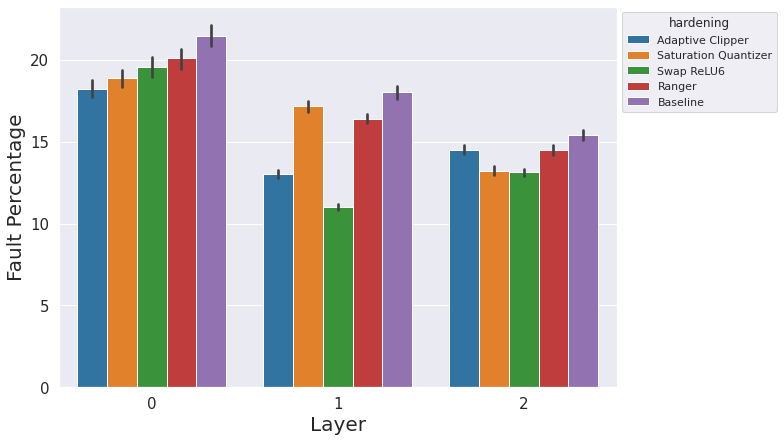

In [10]:
sns.set()
fig, ax = plt.subplots(1,1, figsize=(10,7))
# df_by_layer.plot(kind='bar', ax = ax)
sns.barplot(data = df_by_layer, x = 'layer', y='img_Top1_Crit', hue='hardening', palette='tab10')
ax.set_ylabel('Fault percentage')
# ax.legend(labels=['Adaptive Clipper', 'Saturation Quantizer', 'Ranger', 'Swap ReLU6', 'Baseline'])
ax.set_xlabel('Layer', fontsize=20)
ax.set_ylabel('Fault Percentage', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
sns.move_legend(ax,'upper left',  bbox_to_anchor=(1, 1))

In [11]:
df_by_layer = pd.DataFrame([])
df_list = [custom_general_report, quant_general_report, swap_general_report, ranger_general_report, ref_general_report]
# df_by_layer['Custom ReLU'] = (custom_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
# df_by_layer['Quantization distribution cut'] = (quant_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
# df_by_layer['Swap ReLU6'] = (swap_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
# df_by_layer['Ranger'] = (ranger_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
# df_by_layer['Weak model'] = (ref_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
for idx in range(len(df_list)):
    current_df = deepcopy(df_list[idx])
    current_df['img_Top1_Crit'] = (current_df['img_Top1_Crit']/200)*100
    if idx==0:
        current_df['Hardening strategy'] = 'Adaptive Clipper'
    elif idx ==1: 
        current_df['Hardening strategy'] = 'Saturation Quantizer'
    elif idx==2:
        current_df['Hardening strategy'] = 'Swap ReLU6'
    elif idx == 3:
        current_df['Hardening strategy'] = 'Ranger'
    elif idx==4:
        current_df['Hardening strategy'] = 'Baseline'
    
    df_by_layer=pd.concat([df_by_layer, current_df])

Text(0.5, 1.0, 'CR+BQ(12)')

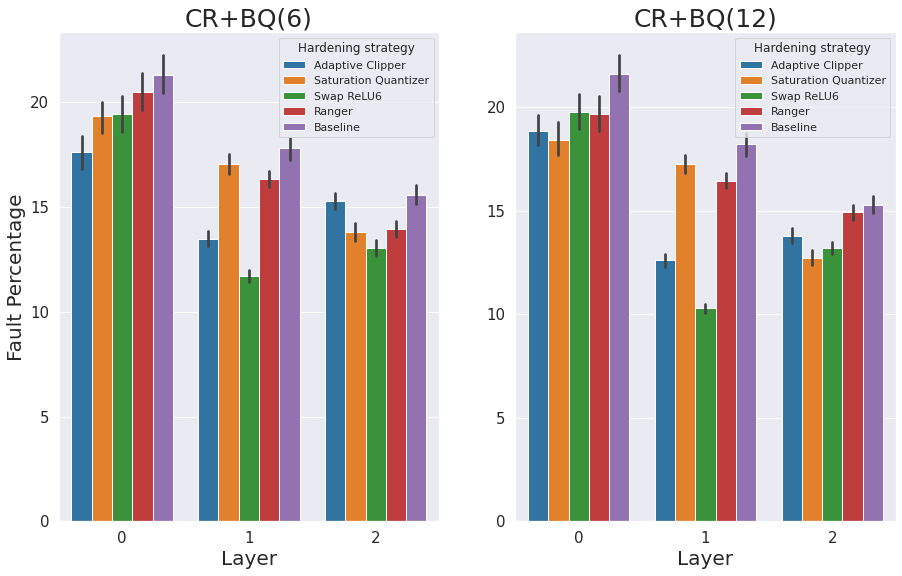

In [ ]:



# df_by_layer_conf6 = df_by_layer[[df_by_layer['conf_detail']=='cnf6']]
# sns.set()
fig, ax = plt.subplots(1,2, figsize=(15,9))
sns.barplot(data = df_by_layer[df_by_layer['conf_detail']=='cnf6'],x='layer', y='img_Top1_Crit', hue='Hardening strategy', palette='tab10',  ax = ax[0])
ax[0].set_ylabel('Fault percentage')
ax[0].set_xlabel('Layer', fontsize=20)
# ax[0].legend([])
ax[0].set_ylabel('Fault Percentage', fontsize=20)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].set_title('CR+BQ(6)', fontsize=25)
# sns.move_legend(ax[0],'upper left',  bbox_to_anchor=(1, 1))
sns.barplot(data = df_by_layer[df_by_layer['conf_detail']=='cnf12'],x='layer', y='img_Top1_Crit', hue='Hardening strategy', palette='tab10',  ax = ax[1])
# ax[1].set_ylabel('Fault percentage')
# ax[1].legend(labels=['Adaptive Clipper', 'Saturation Quantizer', 'Swap ReLU6', 'Ranger', 'Baseline'])
ax[1].set_xlabel('Layer', fontsize=20)
ax[1].set_ylabel('')
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
# ax[0].set_yticks(ax[1].get_yticks())
ax[1].set_title('CR+BQ(12)', fontsize=25)
# sns.move_legend(ax[1],'upper right',  bbox_to_anchor=(1, 1))

In [23]:
# df_by_layer_cnf12['Quantization distribution cut'] - df_by_layer_cnf12['Baseline']
# df_by_layer_cnf6['Custom ReLU'] - df_by_layer_cnf6['Baseline']
new_report = df_by_layer[df_by_layer['conf_detail']=='cnf12']
new_report[new_report['Hardening strategy']=='Adaptive Clipper']['img_Top1_Crit'].mean() - new_report[new_report['Hardening strategy']=='Baseline']['img_Top1_Crit'].mean()

-3.425109983079528

## Effects by configuration

In [10]:
df_by_conf_detail = pd.DataFrame([])
df_by_conf_detail['Custom ReLU'] = (custom_general_report.groupby('conf_detail')['img_Top1_Crit'].mean()/200)*100
df_by_conf_detail['Swap ReLU6'] = (swap_general_report.groupby('conf_detail')['img_Top1_Crit'].mean()/200)*100
df_by_conf_detail['Quantization distribution cut'] = (quant_general_report.groupby('conf_detail')['img_Top1_Crit'].mean()/200)*100
df_by_conf_detail['Ranger'] = (ranger_general_report.groupby('conf_detail')['img_Top1_Crit'].mean()/200)*100
df_by_conf_detail['Weak model'] = (ref_general_report.groupby('conf_detail')['img_Top1_Crit'].mean()/200)*100

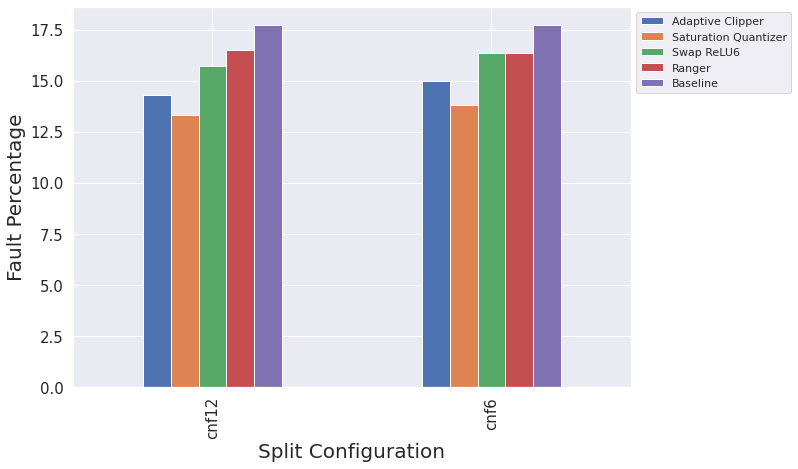

In [11]:
sns.set()
fig, ax = plt.subplots(1,1, figsize=(10,7))
df_by_conf_detail.plot(kind='bar', ax = ax)
ax.set_ylabel('Fault percentage')
ax.legend(labels=['Adaptive Clipper', 'Saturation Quantizer', 'Swap ReLU6', 'Ranger', 'Baseline'])
ax.set_xlabel('Split Configuration', fontsize=20)
ax.set_ylabel('Fault Percentage', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
sns.move_legend(ax,'upper left',  bbox_to_anchor=(1, 1))

Assuming that the weights are distributed around 0, I would say that the distribution of weights with less variance is the most resilient one. Then I would expect that when custom ReLU is applied, and then the model retrained, the weights distribution adapts to this assumption. It works better for split configuration 12 than for configuration 6

## Weights distribution analysis
I want to compare the changing of the weights distribution, specifically in split point which is the most critical one, from split configuration 6 to split configuration 12.

/home/g.esposito/miniconda3/envs/sc2-benchmark/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor(1.1640)
tensor(0.7768)


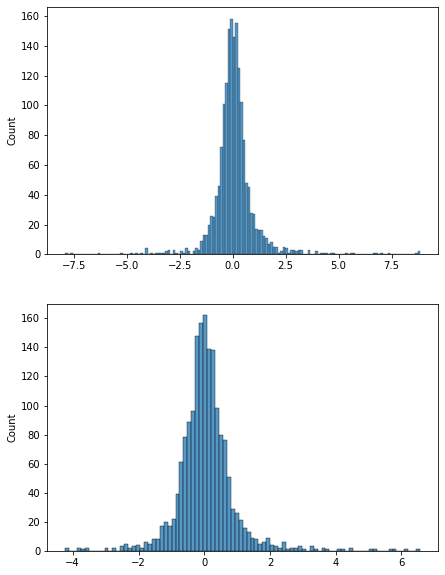

In [10]:
import torch

ref_state_dict = torch.load('/home/g.esposito/AlternativeModels-SC2/resource/ckpt/cifar10/supervised_compression/ghnd-bq/cifar10-mobilenet_v3_small-bq6ch_from_mobilenet_v3_small.pt')
custom_state_dict = torch.load('/home/g.esposito/AlternativeModels-SC2/resource/ckpt/cifar10/supervised_compression/ghnd-bq/cifar10-mobilenet_v3_small-bq6ch_from_mobilenet_v3_smallcustom_relu.pt')
# ref_state_dict.keys()
# type(ref_state_dict['model']['features.bottleneck_layer.encoder.3.weight'])
data_ref = ref_state_dict['model']['features.bottleneck_layer.encoder.3.weight'].flatten().cpu()
data_custom = custom_state_dict['model']['features.bottleneck_layer.encoder.3.weight'].flatten().cpu()
fig, ax = plt.subplots(2,1,figsize=(7,10))
sns.histplot(data= data_ref, ax = ax[0])
sns.histplot(data= data_custom, ax = ax[1])
print(torch.var(data_ref))
print(torch.var(data_custom))

tensor(0.7900)
tensor(0.7817)


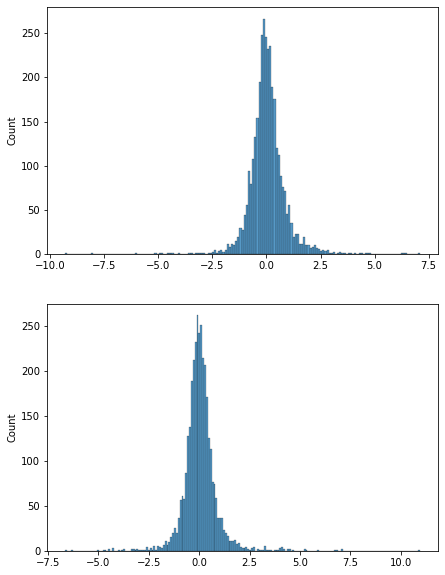

In [11]:
import torch

ref_state_dict = torch.load('/home/g.esposito/AlternativeModels-SC2/resource/ckpt/cifar10/supervised_compression/ghnd-bq/cifar10-mobilenet_v3_small-bq12ch_from_mobilenet_v3_small.pt')
custom_state_dict = torch.load('/home/g.esposito/AlternativeModels-SC2/resource/ckpt/cifar10/supervised_compression/ghnd-bq/cifar10-mobilenet_v3_small-bq12ch_from_mobilenet_v3_smallcustom_relu.pt')
# ref_state_dict.keys()
# type(ref_state_dict['model']['features.bottleneck_layer.encoder.3.weight'])
data_ref = ref_state_dict['model']['features.bottleneck_layer.encoder.3.weight'].flatten().cpu()
data_custom = custom_state_dict['model']['features.bottleneck_layer.encoder.3.weight'].flatten().cpu()
fig, ax = plt.subplots(2,1,figsize=(7,10))
sns.histplot(data= data_ref, ax = ax[0])
sns.histplot(data= data_custom, ax = ax[1])
print(torch.var(data_ref))
print(torch.var(data_custom))

tensor(2.3188)
tensor(1.6747)


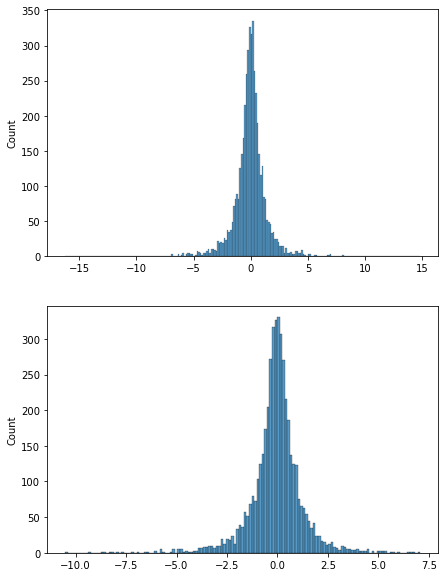

In [32]:
import torch

ref_state_dict = torch.load('/home/g.esposito/AlternativeModels-SC2/resource/ckpt/cifar10/supervised_compression/ghnd-bq/cifar10-mobilenet_v3_small-bq6ch_from_mobilenet_v3_small.pt')
custom_state_dict = torch.load('/home/g.esposito/AlternativeModels-SC2/resource/ckpt/cifar10/supervised_compression/ghnd-bq/cifar10-mobilenet_v3_small-bq6ch_from_mobilenet_v3_smallcustom_relu.pt')
# ref_state_dict.keys()
# type(ref_state_dict['model']['features.bottleneck_layer.encoder.3.weight'])
data_ref = ref_state_dict['model']['features.bottleneck_layer.encoder.0.weight'].flatten().cpu()
data_custom = custom_state_dict['model']['features.bottleneck_layer.encoder.0.weight'].flatten().cpu()
fig, ax = plt.subplots(2,1,figsize=(7,10))
sns.histplot(data= data_ref, ax = ax[0])
sns.histplot(data= data_custom, ax = ax[1])
print(torch.var(data_ref))
print(torch.var(data_custom))

tensor(1.5033)
tensor(1.6258)


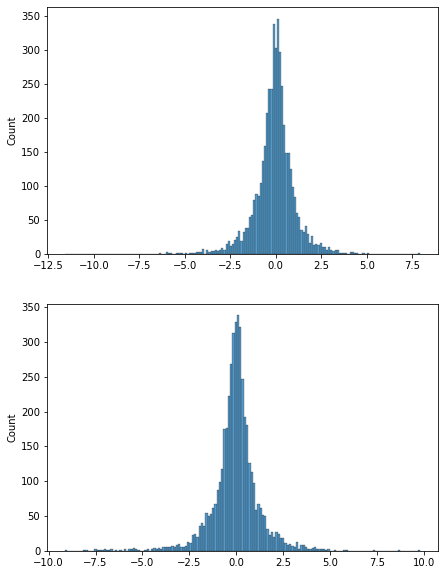

In [33]:
import torch

ref_state_dict = torch.load('/home/g.esposito/AlternativeModels-SC2/resource/ckpt/cifar10/supervised_compression/ghnd-bq/cifar10-mobilenet_v3_small-bq12ch_from_mobilenet_v3_small.pt')
custom_state_dict = torch.load('/home/g.esposito/AlternativeModels-SC2/resource/ckpt/cifar10/supervised_compression/ghnd-bq/cifar10-mobilenet_v3_small-bq12ch_from_mobilenet_v3_smallcustom_relu.pt')
# ref_state_dict.keys()
# type(ref_state_dict['model']['features.bottleneck_layer.encoder.3.weight'])
data_ref = ref_state_dict['model']['features.bottleneck_layer.encoder.0.weight'].flatten().cpu()
data_custom = custom_state_dict['model']['features.bottleneck_layer.encoder.0.weight'].flatten().cpu()
fig, ax = plt.subplots(2,1,figsize=(7,10))
sns.histplot(data= data_ref, ax = ax[0])
sns.histplot(data= data_custom, ax = ax[1])
print(torch.var(data_ref))
print(torch.var(data_custom))

tensor(2.5254)
tensor(2.5254)


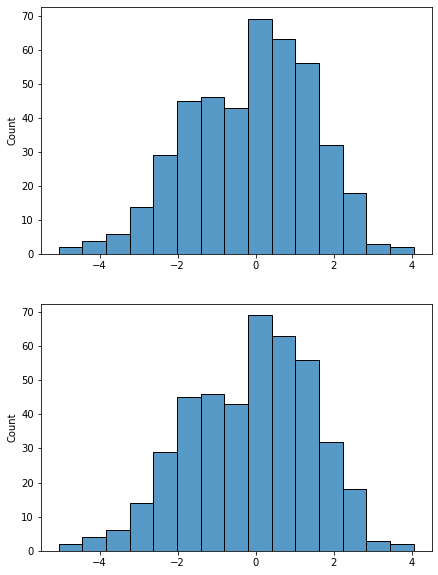

In [35]:
import torch

ref_state_dict = torch.load('/home/g.esposito/AlternativeModels-SC2/resource/ckpt/cifar10/supervised_compression/ghnd-bq/cifar10-mobilenet_v3_small-bq6ch_from_mobilenet_v3_small.pt')
custom_state_dict = torch.load('/home/g.esposito/AlternativeModels-SC2/resource/ckpt/cifar10/supervised_compression/ghnd-bq/cifar10-mobilenet_v3_small-bq6ch_from_mobilenet_v3_smallcustom_relu.pt')
# ref_state_dict.keys()
# type(ref_state_dict['model']['features.bottleneck_layer.encoder.3.weight'])
data_ref = ref_state_dict['model']['features.layer0.0.weight'].flatten().cpu()
data_custom = custom_state_dict['model']['features.layer0.0.weight'].flatten().cpu()
fig, ax = plt.subplots(2,1,figsize=(7,10))
sns.histplot(data= data_ref, ax = ax[0])
sns.histplot(data= data_custom, ax = ax[1])
print(torch.var(data_ref))
print(torch.var(data_custom))

tensor(2.5254)
tensor(2.5254)


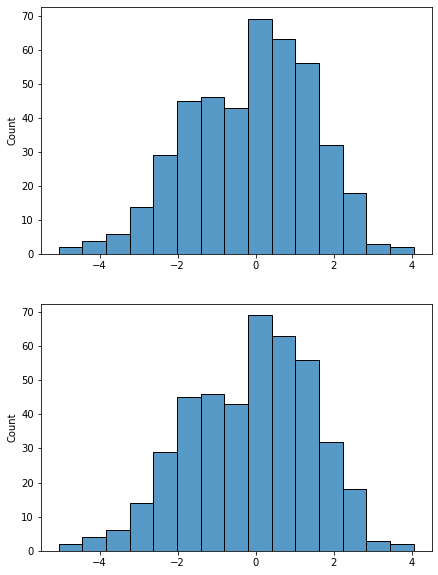

In [36]:
import torch

ref_state_dict = torch.load('/home/g.esposito/AlternativeModels-SC2/resource/ckpt/cifar10/supervised_compression/ghnd-bq/cifar10-mobilenet_v3_small-bq12ch_from_mobilenet_v3_small.pt')
custom_state_dict = torch.load('/home/g.esposito/AlternativeModels-SC2/resource/ckpt/cifar10/supervised_compression/ghnd-bq/cifar10-mobilenet_v3_small-bq12ch_from_mobilenet_v3_smallcustom_relu.pt')
# ref_state_dict.keys()
# type(ref_state_dict['model']['features.bottleneck_layer.encoder.3.weight'])
data_ref = ref_state_dict['model']['features.layer0.0.weight'].flatten().cpu()
data_custom = custom_state_dict['model']['features.layer0.0.weight'].flatten().cpu()
fig, ax = plt.subplots(2,1,figsize=(7,10))
sns.histplot(data= data_ref, ax = ax[0])
sns.histplot(data= data_custom, ax = ax[1])
print(torch.var(data_ref))
print(torch.var(data_custom))

What happens to the feature maps?

In the meanwhile what happened to Safe SDCs?

In [62]:
df_by_layer = pd.DataFrame([])
df_by_layer['Custom ReLU SDC'] = (custom_general_report.groupby('layer')['img_Top1_SDC'].mean()/200)*100
df_by_layer['Swap ReLU6 SDC'] = (swap_general_report.groupby('layer')['img_Top1_SDC'].mean()/200)*100
df_by_layer['Quantization distribution cut SDC'] = (quant_general_report.groupby('layer')['img_Top1_SDC'].mean()/200)*100
df_by_layer['Ranger SDC'] = (ranger_general_report.groupby('layer')['img_Top1_SDC'].mean()/200)*100
df_by_layer['Baseline SDC'] = (ref_general_report.groupby('layer')['img_Top1_SDC'].mean()/200)*100

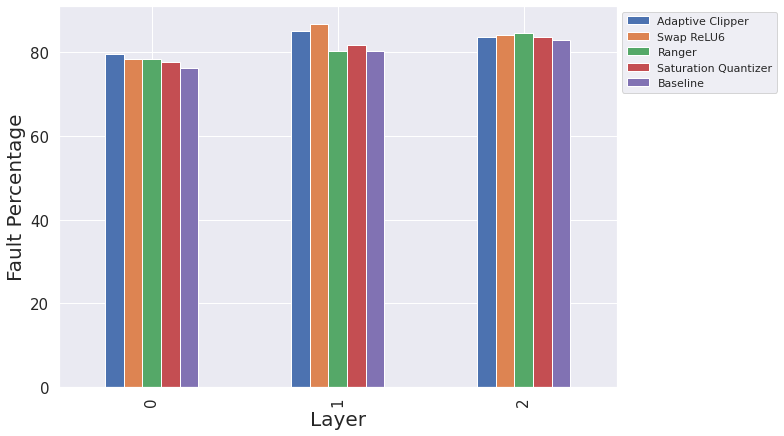

In [63]:
fig, ax = plt.subplots(1,1, figsize=(10, 7))
df_by_layer[['Custom ReLU SDC', 'Swap ReLU6 SDC', 'Quantization distribution cut SDC', 'Ranger SDC', 'Baseline SDC']].plot(kind='bar', ax = ax)
ax.set_ylabel('Fault percentage')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.legend(labels=['Adaptive Clipper', 'Swap ReLU6', 'Ranger', 'Saturation Quantizer', 'Baseline'])
ax.set_xlabel('Layer', fontsize=20)
ax.set_ylabel('Fault Percentage', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
sns.move_legend(ax,'upper left',  bbox_to_anchor=(1, 1))

In [17]:
custom_general_report.columns

Index(['layer', 'kernel', 'channel', 'row', 'col', 'bitmask', 'gold_ACC@1',
       'gold_ACC@k', 'img_Top1_Crit', 'img_Top1_SDC', 'img_Top1_Masked',
       'img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked', 'fault_ACC@1',
       'fault_ACC@k', 'Class_Top1', 'Class_Topk', 'goldenf1_1', 'goldenf1_k',
       'fault_f1@1', 'fault_f1@k', 'goldenrec_1', 'goldenrec_k', 'fault_rec@1',
       'fault_rec@k', 'goldenprec_1', 'goldenprec_k', 'fault_prec@1',
       'fault_prec@k', 'Layer', 'kernel.1', 'channel.1', 'row.1', 'col.1',
       'BitMask', 'Ffree_Weight', 'Faulty_weight', 'Abs_error', 'conf_detail',
       'bit_faulty_pos', 'MRAD', 'MRADk', 'AbsAD', 'AbsADk', 'MRF1D', 'MRF1Dk',
       'AbsF1D', 'AbsF1Dk', 'MRRD', 'MRRDk', 'AbsrD', 'AbsRDk', 'MRPD',
       'MRPDk', 'AbsPD', 'AbsPDk'],
      dtype='object')

In [25]:
df_by_layer_cnf12 = pd.DataFrame([])
df_by_layer_cnf12['Custom ReLU'] = (custom_general_report[custom_general_report['conf_detail']=='cnf12'].groupby('layer')['img_Top1_SDC'].mean()/200)*100
df_by_layer_cnf12['Quantization distribution cut'] = (quant_general_report[quant_general_report['conf_detail']=='cnf12'].groupby('layer')['img_Top1_SDC'].mean()/200)*100
df_by_layer_cnf12['Swap ReLU12'] = (swap_general_report[swap_general_report['conf_detail']=='cnf12'].groupby('layer')['img_Top1_SDC'].mean()/200)*100
df_by_layer_cnf12['Ranger'] = (ranger_general_report[ranger_general_report['conf_detail']=='cnf12'].groupby('layer')['img_Top1_SDC'].mean()/200)*100
df_by_layer_cnf12['Baseline'] = (ref_general_report[ref_general_report['conf_detail']=='cnf12'].groupby('layer')['img_Top1_SDC'].mean()/200)*100

df_by_layer_cnf12['Quantization distribution cut'] - df_by_layer_cnf12['Baseline']

layer
0    2.559305
1   -0.009459
2    1.715391
dtype: float64

In [24]:
df_by_layer_cnf12 = pd.DataFrame([])
df_by_layer_cnf12['Custom ReLU'] = (custom_general_report[custom_general_report['conf_detail']=='cnf12'].groupby('layer')['img_Top1_Masked'].mean()/200)*100
df_by_layer_cnf12['Quantization distribution cut'] = (quant_general_report[quant_general_report['conf_detail']=='cnf12'].groupby('layer')['img_Top1_Masked'].mean()/200)*100
df_by_layer_cnf12['Swap ReLU12'] = (swap_general_report[swap_general_report['conf_detail']=='cnf12'].groupby('layer')['img_Top1_Masked'].mean()/200)*100
df_by_layer_cnf12['Ranger'] = (ranger_general_report[ranger_general_report['conf_detail']=='cnf12'].groupby('layer')['img_Top1_Masked'].mean()/200)*100
df_by_layer_cnf12['Baseline'] = (ref_general_report[ref_general_report['conf_detail']=='cnf12'].groupby('layer')['img_Top1_Masked'].mean()/200)*100

df_by_layer_cnf12['Quantization distribution cut'] - df_by_layer_cnf12['Baseline']

layer
0    0.645876
1    0.987720
2    0.809974
dtype: float64

In [65]:
df_by_conf_detail = pd.DataFrame([])
df_by_conf_detail['Custom ReLU SDC'] = (custom_general_report.groupby('conf_detail')['img_Top1_SDC'].mean()/200)*100
df_by_conf_detail['Swap ReLU6 SDC'] = (swap_general_report.groupby('conf_detail')['img_Top1_SDC'].mean()/200)*100
df_by_conf_detail['Quantization distribution cut SDC'] = (quant_general_report.groupby('conf_detail')['img_Top1_SDC'].mean()/200)*100
df_by_conf_detail['Ranger SDC'] = (ranger_general_report.groupby('conf_detail')['img_Top1_SDC'].mean()/200)*100
df_by_conf_detail['Baseline SDC'] = (ref_general_report.groupby('conf_detail')['img_Top1_SDC'].mean()/200)*100

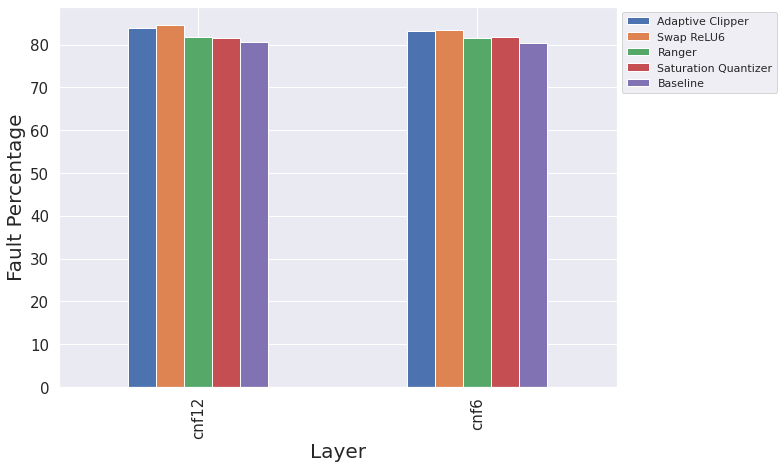

In [66]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
df_by_conf_detail[['Custom ReLU SDC', 'Swap ReLU6 SDC', 'Quantization distribution cut SDC', 'Ranger SDC', 'Baseline SDC']].plot(kind='bar', ax = ax)
ax.set_ylabel('Fault percentage')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.legend(labels=['Adaptive Clipper', 'Swap ReLU6', 'Ranger', 'Saturation Quantizer', 'Baseline'])
ax.set_xlabel('Layer', fontsize=20)
ax.set_ylabel('Fault Percentage', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
sns.move_legend(ax,'upper left',  bbox_to_anchor=(1, 1))

What about masked?

In [67]:
df_by_layer = pd.DataFrame([])
df_by_layer['Custom ReLU Masked'] = (custom_general_report.groupby('layer')['img_Top1_Masked'].mean()/200)*100
df_by_layer['Swap ReLU6 Masked'] = (swap_general_report.groupby('layer')['img_Top1_Masked'].mean()/200)*100
df_by_layer['Quantization distribution cut Masked'] = (quant_general_report.groupby('layer')['img_Top1_Masked'].mean()/200)*100
df_by_layer['Ranger Masked'] = (ranger_general_report.groupby('layer')['img_Top1_Masked'].mean()/200)*100
df_by_layer['Baseline Masked'] = (ref_general_report.groupby('layer')['img_Top1_Masked'].mean()/200)*100

Text(0, 0.5, 'Fault percentage')

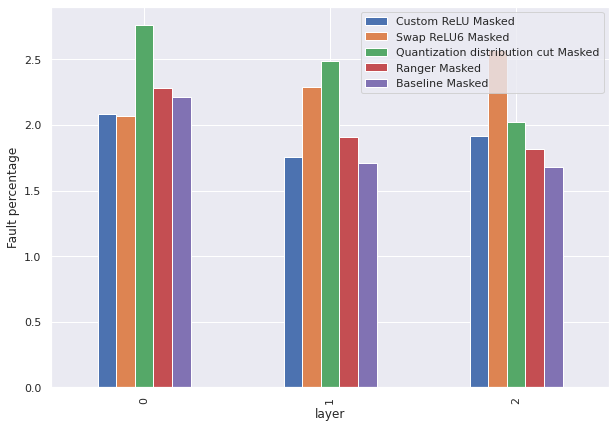

In [68]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
df_by_layer[['Custom ReLU Masked', 'Swap ReLU6 Masked', 'Quantization distribution cut Masked', 'Ranger Masked', 'Baseline Masked']].plot(kind='bar', ax = ax)
ax.set_ylabel('Fault percentage')

In [69]:
df_by_conf_detail = pd.DataFrame([])
df_by_conf_detail['Custom ReLU Masked'] = (custom_general_report.groupby('conf_detail')['img_Top1_Masked'].mean()/200)*100
df_by_conf_detail['Swap ReLU6 Masked'] = (swap_general_report.groupby('conf_detail')['img_Top1_Masked'].mean()/200)*100
df_by_conf_detail['Quantization distribution cut Masked'] = (quant_general_report.groupby('conf_detail')['img_Top1_Masked'].mean()/200)*100
df_by_conf_detail['Ranger Masked'] = (ranger_general_report.groupby('conf_detail')['img_Top1_Masked'].mean()/200)*100
df_by_conf_detail['Baseline Masked'] = (ref_general_report.groupby('conf_detail')['img_Top1_Masked'].mean()/200)*100

Text(0, 0.5, 'Fault percentage')

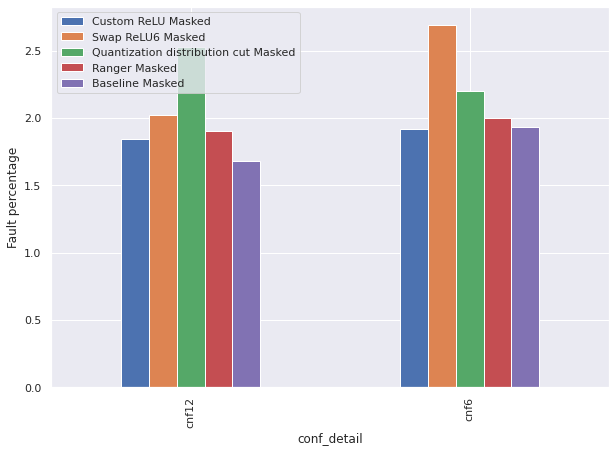

In [71]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
df_by_conf_detail[['Custom ReLU Masked', 'Swap ReLU6 Masked', 'Quantization distribution cut Masked', 'Ranger Masked', 'Baseline Masked']].plot(kind='bar', ax = ax)
ax.set_ylabel('Fault percentage')

And the metric degradation??

In [17]:
df_by_layer = pd.DataFrame([])
df_by_layer['Custom ReLU MRAD'] = (custom_general_report.groupby('layer')['MRAD'].mean())
df_by_layer['Swap ReLU6 MRAD'] = (swap_general_report.groupby('layer')['MRAD'].mean())
df_by_layer['Quantization distribution cut MRAD'] = (quant_general_report.groupby('layer')['MRAD'].mean())
df_by_layer['Ranger MRAD'] = (ranger_general_report.groupby('layer')['MRAD'].mean())
df_by_layer['Baseline MRAD'] = (ref_general_report.groupby('layer')['MRAD'].mean())

Text(0, 0.5, 'MRAD')

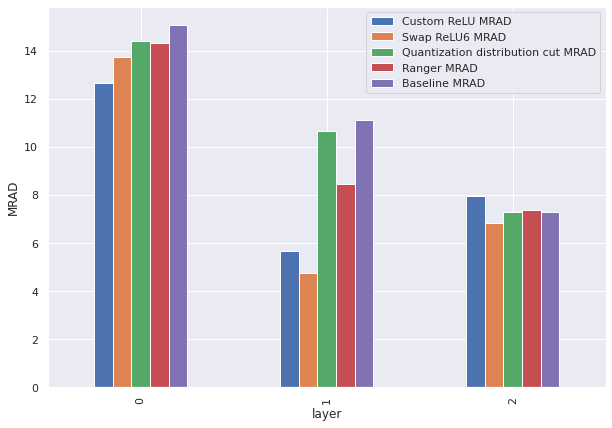

In [18]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
df_by_layer[['Custom ReLU MRAD', 'Swap ReLU6 MRAD', 'Quantization distribution cut MRAD', 'Ranger MRAD', 'Baseline MRAD']].plot(kind='bar', ax = ax)
ax.set_ylabel('MRAD')

In [50]:
MRAD_by_layer = pd.DataFrame([])
df_list = [swap_general_report, custom_general_report, ranger_general_report, quant_general_report, ref_general_report]
# MRAD_by_layer['Custom ReLU'] = (custom_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
# MRAD_by_layer['Quantization distribution cut'] = (quant_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
# MRAD_by_layer['Swap ReLU6'] = (swap_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
# MRAD_by_layer['Ranger'] = (ranger_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
# MRAD_by_layer['Weak model'] = (ref_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
for idx in range(len(df_list)):
    current_df = df_list[idx]
    # current_df['img_Top1_Crit'] = (current_df['MRAD']/200)*100
    if idx==1:
        current_df['Hardening strategy'] = 'Adaptive Clipper'
    elif idx ==3: 
        current_df['Hardening strategy'] = 'Saturation Quantizer'
    elif idx==0:
        current_df['Hardening strategy'] = 'Swap ReLU6'
    elif idx == 2:
        current_df['Hardening strategy'] = 'Ranger'
    elif idx==4:
        current_df['Hardening strategy'] = 'Baseline'
    
    MRAD_by_layer=pd.concat([MRAD_by_layer, current_df])

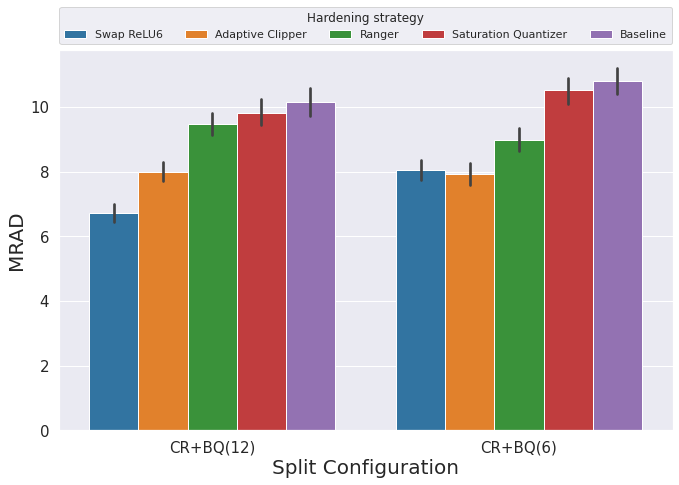

In [51]:

fig, ax = plt.subplots(1,1, figsize=(11,7))
# df_by_conf_detail[['Swap ReLU6 MRAD', 'Ranger MRAD', 'Quantization distribution cut MRAD', 'Baseline MRAD', 'Custom ReLU MRAD']].plot(kind='bar', ax = ax)
sns.barplot(data = MRAD_by_layer,x='conf_detail', y='MRAD', hue='Hardening strategy', palette='tab10',  ax = ax)
# ax.legend(labels=['Swap ReLU6',  'Ranger', 'Saturation Quantizer', 'Baseline', 'Adaptive Clipper'])
ax.set_xlabel('Split Configuration', fontsize=20)
ax.set_ylabel('MRAD', fontsize=20)
ax.set_xticklabels(['CR+BQ(12)', 'CR+BQ(6)'])
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.legend(fontsize=15)
sns.move_legend(ax, "lower center", ncol=5,title='Hardening strategy',bbox_to_anchor=(0.5,1.0))
# how much probability space does confidence levels span?

Text(0.5, 1.0, 'Split configuration 12')

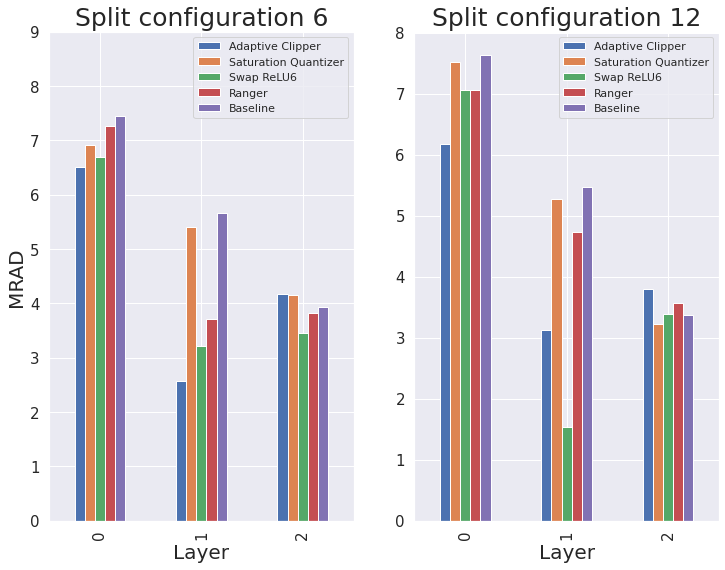

In [21]:
df_by_layer_cnf12 = pd.DataFrame([])
df_by_layer_cnf12['Custom ReLU'] = (custom_general_report[custom_general_report['conf_detail']=='cnf12'].groupby('layer')['MRAD'].mean()/200)*100
df_by_layer_cnf12['Quantization distribution cut'] = (quant_general_report[quant_general_report['conf_detail']=='cnf12'].groupby('layer')['MRAD'].mean()/200)*100
df_by_layer_cnf12['Swap ReLU6'] = (swap_general_report[swap_general_report['conf_detail']=='cnf12'].groupby('layer')['MRAD'].mean()/200)*100
df_by_layer_cnf12['Ranger'] = (ranger_general_report[ranger_general_report['conf_detail']=='cnf12'].groupby('layer')['MRAD'].mean()/200)*100
df_by_layer_cnf12['Baseline'] = (ref_general_report[ref_general_report['conf_detail']=='cnf12'].groupby('layer')['MRAD'].mean()/200)*100

df_by_layer_cnf6 = pd.DataFrame([])
df_by_layer_cnf6['Custom ReLU'] = (custom_general_report[custom_general_report['conf_detail']=='cnf6'].groupby('layer')['MRAD'].mean()/200)*100
df_by_layer_cnf6['Quantization distribution cut'] = (quant_general_report[quant_general_report['conf_detail']=='cnf6'].groupby('layer')['MRAD'].mean()/200)*100
df_by_layer_cnf6['Swap ReLU6'] = (swap_general_report[swap_general_report['conf_detail']=='cnf6'].groupby('layer')['MRAD'].mean()/200)*100
df_by_layer_cnf6['Ranger'] = (ranger_general_report[ranger_general_report['conf_detail']=='cnf6'].groupby('layer')['MRAD'].mean()/200)*100
df_by_layer_cnf6['Baseline'] = (ref_general_report[ref_general_report['conf_detail']=='cnf6'].groupby('layer')['MRAD'].mean()/200)*100


# df_by_layer_conf6 = df_by_layer[[df_by_layer['conf_detail']=='cnf6']]
sns.set()
fig, ax = plt.subplots(1,2, figsize=(12,9))
df_by_layer_cnf6.plot(kind='bar', ax = ax[0])
ax[0].set_ylabel('MRAD')
ax[0].legend(labels=['Adaptive Clipper', 'Saturation Quantizer', 'Swap ReLU6', 'Ranger', 'Baseline'])
ax[0].set_xlabel('Layer', fontsize=20)
ax[0].set_ylabel('MRAD', fontsize=20)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].set_title('Split configuration 6', fontsize=25)
# sns.move_legend(ax[0],'upper left',  bbox_to_anchor=(1, 1))
df_by_layer_cnf12.plot(kind='bar', ax = ax[1])
# ax[1].set_ylabel('MRAD')
ax[1].legend(labels=['Adaptive Clipper', 'Saturation Quantizer', 'Swap ReLU6', 'Ranger', 'Baseline'])
ax[1].set_xlabel('Layer', fontsize=20)
# ax[1].set_ylabel('MRAD', fontsize=20)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
ax[0].set_yticks(ax[1].get_yticks())
ax[1].set_title('Split configuration 12', fontsize=25)
# sns.move_legend(ax[1],'upper left',  bbox_to_anchor=(1, 1))

In [28]:
def calculate_mse(dataset1, dataset2):
    # Ensure that both datasets have the same shape
    assert dataset1.shape == dataset2.shape

    # Calculate the squared differences between corresponding vectors
    # abs_diff = abs(dataset1 - dataset2)
    squared_diff = np.square(dataset1 - dataset2)

    # Calculate the mean of the squared differences
    mse = np.sqrt(np.mean(squared_diff, axis=1))

    return mse

In [29]:
ref_under_analysis = ref_new_report.query("F_pred0.isnull()==False")
ref_under_analysis

In [30]:
ref_under_analysis

,Unnamed: 0,FaultID,imID,layer,kernel,channel,row,col,bitmask,G_Target,...,G_clas1,G_clas2,G_clas3,G_clas4,G_pred0,G_pred1,G_pred2,G_pred3,G_pred4,conf_detail
0,0,F_0_results,2,1,22,3,2,0,134217728,8,...,0,1,3,9,6.676178,5.027028,4.659886,1.254137,0.926760,cnf6
1,1,F_0_results,39,1,22,3,2,0,134217728,5,...,2,3,5,4,3.916554,3.678868,3.522853,3.127555,-0.588198,cnf6
2,2,F_0_results,43,1,22,3,2,0,134217728,5,...,3,7,4,2,8.742837,7.678144,4.277084,1.750341,-1.448308,cnf6
3,3,F_0_results,51,1,22,3,2,0,134217728,2,...,4,5,2,7,5.865958,4.225781,3.241660,1.156629,1.066782,cnf6
4,4,F_0_results,65,1,22,3,2,0,134217728,0,...,8,2,4,3,4.825854,4.770871,3.317292,1.401351,1.353536,cnf6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655432,78392,F_2933_results,93,0,3,1,2,0,33554432,1,...,1,8,6,0,5.294429,4.297221,3.125706,0.322616,0.280057,cnf6
655433,78393,F_2933_results,131,0,3,1,2,0,33554432,7,...,3,5,4,1,4.548457,4.067260,0.720147,0.064418,-0.634832,cnf6
655434,78394,F_2933_results,172,0,3,1,2,0,33554432,3,...,6,5,2,4,9.438649,7.714418,2.055788,1.064389,0.229529,cnf6
655435,78395,F_2933_results,185,0,3,1,2,0,33554432,5,...,3,4,7,2,9.617050,6.770519,4.362406,3.587633,-0.999774,cnf6


In [33]:
ref_under_analysis

Index(['Unnamed: 0', 'FaultID', 'imID', 'layer', 'kernel', 'channel', 'row',
       'col', 'bitmask', 'G_Target', 'F_clas0', 'F_clas1', 'F_clas2',
       'F_clas3', 'F_clas4', 'F_pred0', 'F_pred1', 'F_pred2', 'F_pred3',
       'F_pred4', 'G_clas0', 'G_clas1', 'G_clas2', 'G_clas3', 'G_clas4',
       'G_pred0', 'G_pred1', 'G_pred2', 'G_pred3', 'G_pred4', 'conf_detail',
       'Confidence Error', 'Top1 distance'],
      dtype='object')

In [34]:
ref_under_analysis['Confidence Error'] = calculate_mse(ref_under_analysis[['G_pred0', 'G_pred1', 'G_pred2', 'G_pred3', 'G_pred4']].values, ref_under_analysis[['F_pred0', 'F_pred1', 'F_pred2', 'F_pred3','F_pred4']].values)
ref_under_analysis['Confidence Error'] = abs(ref_under_analysis['G_pred0'] - ref_under_analysis['F_pred0'])
ref_under_analysis['Top1 distance'] = ref_under_analysis['F_pred0'] - ref_under_analysis['F_pred1']
# ref_under_analysis = ref_under_analysis.sort_values(by='Top1 distance')
ref_under_analysis[ref_under_analysis['conf_detail']=='cnf6']

,Unnamed: 0,FaultID,imID,layer,kernel,channel,row,col,bitmask,G_Target,...,G_clas3,G_clas4,G_pred0,G_pred1,G_pred2,G_pred3,G_pred4,conf_detail,Confidence Error,Top1 distance
101581,101581,F_4196_results,154,1,27,8,2,1,268435456,3,...,4,6,6.209205,3.693007,1.633556,0.568500,-0.040513,cnf6,1.886378e+00,6.198883e-06
166812,20947,F_930_results,111,1,8,0,0,1,16777216,3,...,4,5,2.819835,2.179733,1.844288,1.704297,0.738025,cnf6,1.221640e+00,1.049042e-05
486848,94663,F_4458_results,159,2,5,2,1,2,8388608,2,...,5,3,6.277998,2.656336,2.285297,2.149419,1.462903,cnf6,2.064436e+00,1.287460e-05
41907,41907,F_1683_results,12,1,19,8,2,0,16777216,5,...,3,9,4.235842,3.346393,2.259527,2.060907,0.708999,cnf6,3.063021e-01,2.241135e-05
323196,45564,F_2248_results,6,2,5,13,0,1,536870912,1,...,3,0,6.382654,2.774379,2.453999,1.085340,-0.091024,cnf6,2.567122e+00,2.455711e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373432,95800,F_4881_results,66,2,4,19,2,1,1073741824,5,...,0,9,12.053643,4.898699,1.899942,1.216884,1.205580,cnf6,2.413741e+36,1.126474e+36
315161,37529,F_1875_results,50,2,7,26,1,2,1073741824,7,...,5,2,7.033303,3.901102,1.877620,1.602181,0.634422,cnf6,2.093473e+36,1.134763e+36
33579,33579,F_1369_results,37,1,28,11,2,2,1073741824,6,...,4,1,16.135782,2.705042,1.209613,-0.705150,-1.324372,cnf6,2.257918e+36,1.164440e+36
131181,131181,F_5454_results,173,1,11,13,2,1,1073741824,8,...,9,3,13.884358,7.815807,4.578928,2.024703,-2.484283,cnf6,2.665341e+36,1.228022e+36


In [17]:
MRAD_by_layer = pd.DataFrame([])
df_list = [swap_general_report, ranger_general_report, quant_general_report, ref_general_report, custom_general_report]
# MRAD_by_layer['Custom ReLU'] = (custom_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
# MRAD_by_layer['Quantization distribution cut'] = (quant_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
# MRAD_by_layer['Swap ReLU6'] = (swap_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
# MRAD_by_layer['Ranger'] = (ranger_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
# MRAD_by_layer['Weak model'] = (ref_general_report.groupby('layer')['img_Top1_Crit'].mean()/200)*100
for idx in range(len(df_list)):
    current_df = df_list[idx]
    # current_df['img_Top1_Crit'] = (current_df['MRAD']/200)*100
    if idx==4:
        current_df['Hardening strategy'] = 'Adaptive Clipper'
    elif idx ==2: 
        current_df['Hardening strategy'] = 'Saturation Quantizer'
    elif idx==0:
        current_df['Hardening strategy'] = 'Swap ReLU6'
    elif idx == 1:
        current_df['Hardening strategy'] = 'Ranger'
    elif idx==3:
        current_df['Hardening strategy'] = 'Baseline'
    
    MRAD_by_layer=pd.concat([MRAD_by_layer, current_df], ignore_index=True)

In [18]:
# MRAD_by_layer[MRAD_by_layer['Hardening strategy']=='Baseline'][MRAD_by_layer['conf_detail']=='cnf12']['img_Top1_Crit'].mean() - MRAD_by_layer[MRAD_by_layer['Hardening strategy']=='Adaptive Clipper'][MRAD_by_layer['conf_detail']=='cnf12']['img_Top1_Crit'].mean()
#['img_Top1_Crit'] - MRAD_by_layer[MRAD_by_layer['Hardening strategy']=='Adaptive Clipper']['img_Top1_Crit']

Text(0.5, 1.0, 'CR+BQ(12)')

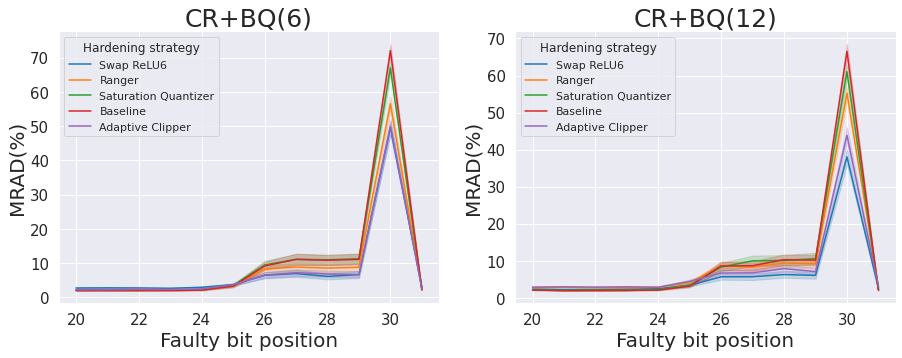

In [20]:
# cosa succede per hardening technique per ogni bit position?

# index = MRAD_by_layer['bit_faulty_pos']>15

sns.set()
f, ax = plt.subplots(1,2, figsize=(15, 5))
sns.despine(f)
sns.lineplot(data=MRAD_by_layer[MRAD_by_layer['conf_detail']=='cnf6'],x='bit_faulty_pos',y='MRAD',hue='Hardening strategy', palette="tab10", ax = ax[0])
ax[0].tick_params('x', labelsize=15)
ax[0].tick_params('y', labelsize=15)
ax[0].set_xlabel('Faulty bit position', fontsize=20)
ax[0].set_ylabel('MRAD(%)', fontsize=20)
ax[0].set_title('CR+BQ(6)', fontsize=25)
sns.despine(f)
sns.lineplot(data=MRAD_by_layer[MRAD_by_layer['conf_detail']=='cnf12'],x='bit_faulty_pos',y='MRAD',hue='Hardening strategy', palette="tab10", ax = ax[1])
ax[1].tick_params('x', labelsize=15)
ax[1].tick_params('y', labelsize=15)
ax[1].set_xlabel('Faulty bit position', fontsize=20)
ax[1].set_ylabel('MRAD(%)', fontsize=20)
ax[1].set_title('CR+BQ(12)', fontsize=25)
# ax.legend(title='Injection Layer', labels=['0','1','2','3','4'])
# ax.set_yscale('log')


In [10]:
MRAD_by_layer[MRAD_by_layer['Hardening strategy']=='Baseline']['img_Top1_Crit'] - MRAD_by_layer[MRAD_by_layer['Hardening strategy']=='Adaptive Clipper']['img_Top1_Crit']

86505    NaN
86506    NaN
86507    NaN
86508    NaN
86509    NaN
          ..
144170   NaN
144171   NaN
144172   NaN
144173   NaN
144174   NaN
Name: img_Top1_Crit, Length: 57670, dtype: float64

In [119]:
# MRAD_by_layer.query("Hardening\ strategy == 'Adaptive\ Clipper' and bit_faulty_pos==30")['MRAD'].mean()
new_df = MRAD_by_layer[MRAD_by_layer['Hardening strategy']=='Adaptive Clipper']
new_df = new_df[new_df['bit_faulty_pos']==30]
new_df['MRAD'].mean()

37.23646442482536

In [120]:
# MRAD_by_layer.query("Hardening\ strategy == 'Adaptive\ Clipper' and bit_faulty_pos==30")['MRAD'].mean()
new_df = MRAD_by_layer[MRAD_by_layer['Hardening strategy']=='Baseline']
new_df = new_df[new_df['bit_faulty_pos']==30]
new_df['MRAD'].mean()

69.21335704113797

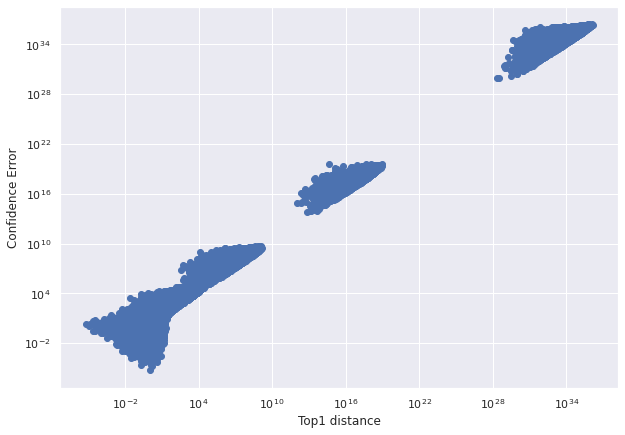

In [37]:
plt.rcParams['agg.path.chunksize'] = 10000
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.scatter(ref_under_analysis['Top1 distance'], ref_under_analysis['Confidence Error'])
ax.set_xlabel('Top1 distance')
ax.set_ylabel('Confidence Error')
ax.set_xscale('log')
ax.set_yscale('log')
fig.savefig('top1VSConfidenceError.png')

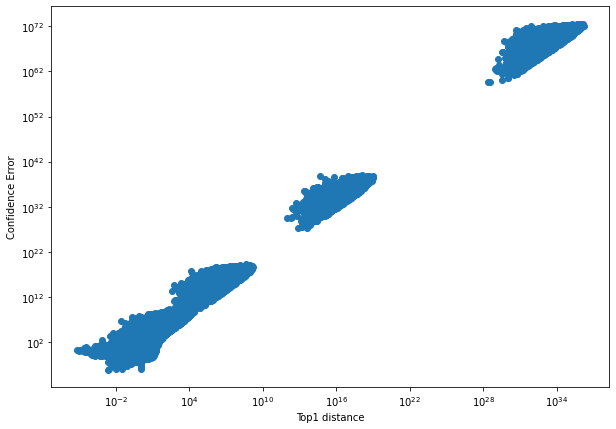

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.scatter(ref_under_analysis['Top1 distance'], ref_under_analysis['Confidence Error'])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Top1 distance')
ax.set_ylabel('Confidence Error')
fig.savefig('top1VSConfidenceError.png')

In [12]:
custom_under_analysis = custom_new_report.query("F_pred0.isnull()==False")
custom_under_analysis['Confidence Error'] = calculate_mse(custom_under_analysis[['G_pred0', 'G_pred1', 'G_pred2', 'G_pred3', 'G_pred4']].values, custom_under_analysis[['F_pred0', 'F_pred1', 'F_pred2', 'F_pred3','F_pred4']].values)
custom_under_analysis['Top1 distance'] = custom_under_analysis['F_pred0'] - custom_under_analysis['F_pred1']
custom_under_analysis = custom_under_analysis.sort_values(by='Top1 distance')


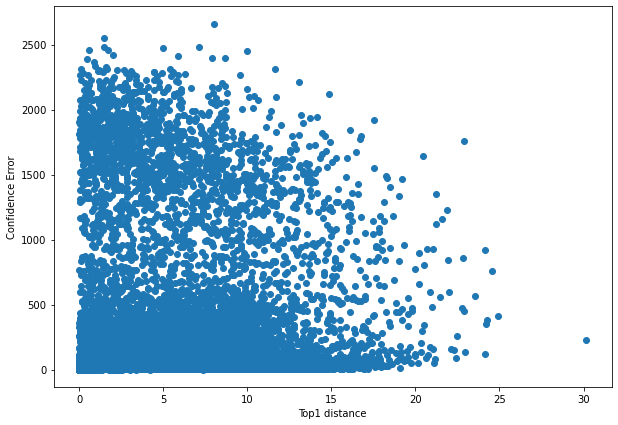

In [13]:
plt.rcParams['agg.path.chunksize'] = 10000
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.scatter(custom_under_analysis['Top1 distance'], custom_under_analysis['Confidence Error'])
ax.set_xlabel('Top1 distance')
ax.set_ylabel('Confidence Error')
fig.savefig('top1VSConfidenceError.png')

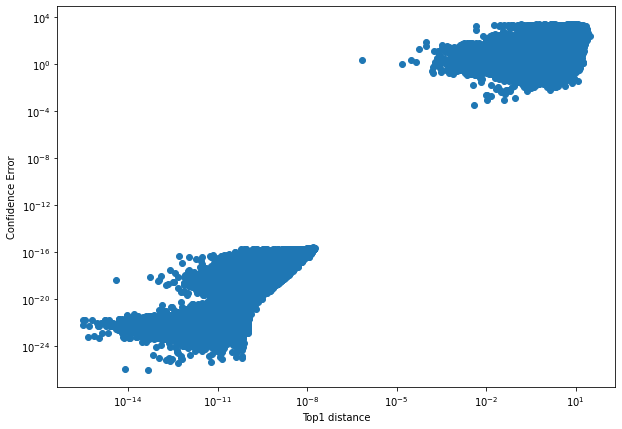

In [14]:
plt.rcParams['agg.path.chunksize'] = 10000
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.scatter(custom_under_analysis['Top1 distance'], custom_under_analysis['Confidence Error'])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Top1 distance')
ax.set_ylabel('Confidence Error')
fig.savefig('top1VSConfidenceError.png')

In [67]:
ref_new_report.isna().sum()

Unnamed: 0              0
FaultID                 0
imID                    0
layer                   0
kernel                  0
channel                 0
row                     0
col                     0
bitmask                 0
G_Target                0
F_clas0                 0
F_clas1                 0
F_clas2                 0
F_clas3                 0
F_clas4                 0
F_pred0             75635
F_pred1             75635
F_pred2             75635
F_pred3             75635
F_pred4             75635
G_clas0                 0
G_clas1                 0
G_clas2                 0
G_clas3                 0
G_clas4                 0
G_pred0                 0
G_pred1                 0
G_pred2                 0
G_pred3                 0
G_pred4                 0
conf_detail             0
Confidence Error    75635
Top1 distance       75635
dtype: int64

In [40]:
# ref_general_report.query("F_pred0.isnull()==True")
# print(swap_general_report)
ref_general_report.columns

Index(['layer', 'kernel', 'channel', 'row', 'col', 'bitmask', 'gold_ACC@1',
       'gold_ACC@k', 'img_Top1_Crit', 'img_Top1_SDC', 'img_Top1_Masked',
       'img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked', 'fault_ACC@1',
       'fault_ACC@k', 'Class_Top1', 'Class_Topk', 'goldenf1_1', 'goldenf1_k',
       'fault_f1@1', 'fault_f1@k', 'goldenrec_1', 'goldenrec_k', 'fault_rec@1',
       'fault_rec@k', 'goldenprec_1', 'goldenprec_k', 'fault_prec@1',
       'fault_prec@k', 'Layer', 'kernel.1', 'channel.1', 'row.1', 'col.1',
       'BitMask', 'Ffree_Weight', 'Faulty_weight', 'Abs_error', 'conf_detail',
       'bit_faulty_pos', 'MRAD', 'MRADk', 'AbsAD', 'AbsADk', 'MRF1D', 'MRF1Dk',
       'AbsF1D', 'AbsF1Dk', 'MRRD', 'MRRDk', 'AbsrD', 'AbsRDk', 'MRPD',
       'MRPDk', 'AbsPD', 'AbsPDk'],
      dtype='object')

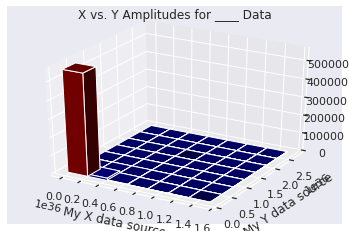

In [42]:
import matplotlib.cm as cm
fig = plt.figure() #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')


hist, xedges, yedges = np.histogram2d(ref_under_analysis['Top1 distance'], ref_under_analysis['Confidence Error'], bins=(7,7)) # you can change your bins, and the range on which to take data
# hist is a 7X7 matrix, with the populations for each of the subspace parts.
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:]) -(xedges[1]-xedges[0])

xpos = xpos.flatten()*1./2
ypos = ypos.flatten()*1./2
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title("X vs. Y Amplitudes for ____ Data")
plt.xlabel("My X data source")
plt.ylabel("My Y data source")
plt.savefig("Your_title_goes_here")
plt.show()


# plt.rcParams['agg.path.chunksize'] = 10000
# fig, ax = plt.subplots(1,1,figsize=(10,7))
# sns.histplot(ref_new_report['Top1 distance'], ref_new_report['Confidence Error'], ax = ax)
# ax.set_yscale('log')
# ax.set_xlabel('Top1 distance')
# ax.set_ylabel('Confidence Error')
# fig.savefig('top1VSConfidenceError.png')

ValueError: Contour levels must be increasing

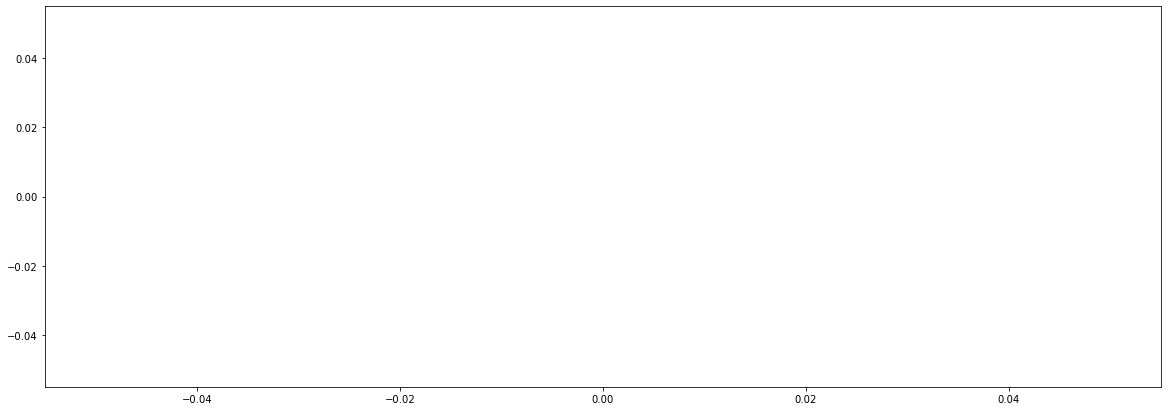

In [29]:
fig, ax = plt.subplots(1,1, figsize=(20,7))
sns.kdeplot(data=new_report, x='Top1 distance', y='Confidence Error', ax = ax, levels=50)

In [10]:
general_report[['F_pred0', 'F_pred1', 'F_pred2', 'F_pred3','F_pred4']]

,F_pred0,F_pred1,F_pred2,F_pred3,F_pred4
0,6.288938,5.937834,2.199347,1.614632,-1.403697
1,7.538578,5.049768,3.209136,1.920716,-1.427795
2,6.380181,6.050093,2.889213,2.831064,-1.540521
3,3.851625,2.997021,1.884683,1.592599,-0.252440
4,8.140289,7.808895,3.246369,2.308474,-1.499104
...,...,...,...,...,...
318526,4.941833,4.156545,1.512875,0.398740,-1.257821
318527,4.863288,4.400342,1.943396,1.400725,-0.859329
318528,12.961802,6.736970,0.911896,0.047356,-0.617723
318529,8.201708,7.395428,4.523251,1.849866,-1.896532
